### **Model Evaluation in Regression**

1. **Introduction to Model Evaluation**

   * মডেল কতটা ভালো predict করছে তা পরিমাপ করার প্রক্রিয়া।
   * Regression মডেলে prediction error quantify করতে metrics ব্যবহার করা হয়।

2. **Mean Absolute Error (MAE)**

   * Prediction error-এর **average absolute value**।
   * Formula: $MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|$
   * ছোট MAE → ভালো prediction।
   * সহজে “average ভুলের পরিমাণ” বোঝায়।

3. **Interpreting MAE in Regression Models**

   * MAE tells you on average, model predictions are **this much off** from true values.
   * Outliers-এর প্রভাব কম।

4. **Root Mean Squared Error (RMSE)**

   * Error-এর square-এর mean-এর square root।
   * Formula: $RMSE = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}$
   * বড় errors-কে বেশি penalize করে।
   * ছোট RMSE → ভালো prediction।

5. **Difference between MAE and RMSE**

   * **MAE:** simple average error, outlier impact কম।
   * **RMSE:** squared error, outlier impact বেশি।
   * RMSE ≥ MAE সবসময়।

6. **R-squared (R²)**

   * Model কতটা variance explain করছে তা measure করে।
   * Formula: $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
   * 0–1 এর মধ্যে থাকে। 1 = perfect fit, 0 = model useless।

7. **Interpreting R² as Model Accuracy**

   * R² = 0.8 → model 80% variation explain করতে পারছে।
   * R² যত বেশি, model fit তত ভালো।

8. **Choosing the Right Metric for Evaluation**

   * **MAE:** outliers কম গুরুত্বপূর্ণ হলে।
   * **RMSE:** বড় errors avoid করতে হলে।
   * **R²:** overall fit বা variance explain দেখতে।
   * Metric নির্বাচন problem nature অনুযায়ী।

---




### 1. পরিচিতি (Introduction)

যখন আমরা regression মডেল বানাই, শুধুমাত্র মডেল train করা যথেষ্ট নয় — আমাদের **মডেল কতটা ভালো কাজ করছে তা evaluate করাও জরুরি**।

বিভিন্ন **evaluation metrics** আমাদের সাহায্য করে বুঝতে যে, মডেলের predictions আসল মানের কতটা কাছাকাছি।

মেট্রিকসের দিকে যাওয়ার আগে, চলুন **ছোট dataset ব্যবহার করে Gradient Descent থেকে একটি simple linear regression মডেল** তৈরি করি।

---


# 2. Load a Simple Dataset

/tmp/ipython-input-1058286987.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


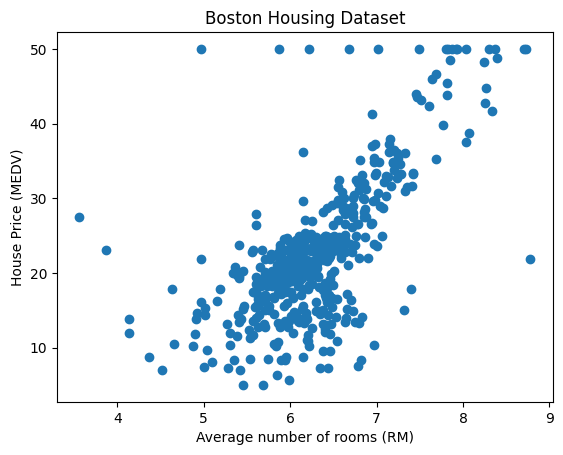

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a simple dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

# Load dataset (Boston Housing)
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# Use only one input feature: RM (average rooms)
X = housing['RM'].values.reshape(-1, 1) # shape (m, 1)
y = housing['MEDV'].values.reshape(-1, 1) # shape (m, 1); MEDV is in $1000s

plt.scatter(X, y)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Boston Housing Dataset")
plt.show()

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

* `numpy` → array ও numerical operations এর জন্য
* `pandas` → dataset load এবং manipulate করার জন্য
* `matplotlib.pyplot` → data visualization এর জন্য

---

```python
# Generate a simple dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
```

* Boston Housing dataset এর URL সংরক্ষণ করা হয়েছে।
* আমরা এটি ব্যবহার করে regression মডেল train করব।

---

```python
# Load dataset (Boston Housing)
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
```

* Dataset এ column নামগুলো define করা হয়েছে।
* MEDV → house price (target), RM → average rooms (feature)।

---

```python
housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)
```

* Dataset load করা হয়েছে pandas DataFrame এ।
* `delim_whitespace=True` → whitespace দিয়ে column separate করা হয়েছে।
* `names=columns` → আগেই define করা column নামগুলো assign করা হয়েছে।

---

```python
# Use only one input feature: RM (average rooms)
X = housing['RM'].values.reshape(-1, 1) # shape (m, 1)
y = housing['MEDV'].values.reshape(-1, 1) # shape (m, 1); MEDV is in $1000s
```

* শুধুমাত্র **RM feature** ব্যবহার করা হয়েছে।
* `reshape(-1, 1)` → sklearn / numpy compatible 2D array তৈরি করে।
* X → input (feature), y → target (house price)।

---

```python
plt.scatter(X, y)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Boston Housing Dataset")
plt.show()
```

* Scatter plot তৈরি করা হয়েছে।
* X-axis → RM (average rooms), Y-axis → MEDV (house price)
* Dataset এর distribution এবং relationship visualize করা হচ্ছে।

---



In [4]:
print(X[:5])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [5]:
print(y[:5])

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [6]:
len(housing)

506

In [5]:
housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)
housing.head()

/tmp/ipython-input-42362622.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
housing.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


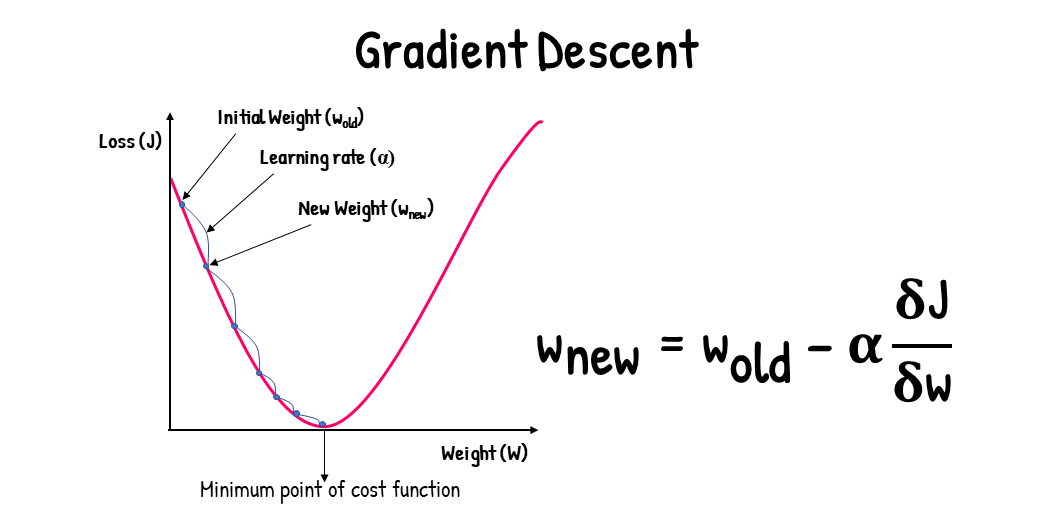


---

### **Diagram Overview**

* X-axis: **Weight (w)** → মডেলের parameter (coefficient)
* Y-axis: **Loss (J)** → Cost function value (যতটা ভুল prediction করছে মডেল)
* Curve → Loss function plotted against weight
* Goal → Loss minimize করা, অর্থাৎ curve-এর **lowest point** খুঁজে বের করা

---

### **Elements in the Diagram**

1. **Initial Weight (w\_old)**

   * শুরুতে মডেলের weight-এর মান।
   * শুরুতে আমাদের guess থাকে, random বা zero value হতে পারে।

2. **Learning Rate (α)**

   * Learning rate নির্দেশ করে **weight update কত দ্রুত হবে**।
   * ছোট α → ধীরে ধীরে descent (slow convergence)
   * বড় α → দ্রুত descent কিন্তু overshoot হতে পারে

3. **New Weight (w\_new)**

   * Gradient Descent এর step-এর পর weight update হয়ে নতুন মান পায়।
   * Formula:

$$
w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial J}{\partial w}
$$

* $\frac{\partial J}{\partial w}$ → gradient (slope of the loss function w\.r.t weight)
* Gradient দেখায় **weight increase করলে loss কিভাবে পরিবর্তিত হবে**

4. **Gradient ($\partial J / \partial w$)**

   * Loss function এর slope
   * Negative gradient নির্দেশ করে weight কমানো, positive gradient নির্দেশ করে weight বাড়ানো

5. **Descent Path**

   * Diagram-এ blue dots → successive steps of Gradient Descent
   * Weight update করে ধীরে ধীরে curve-এর **lowest point (minimum of cost function)** এর দিকে চলে যায়

6. **Minimum Point of Cost Function**

   * যেখানে loss function সবচেয়ে কম → optimal weight
   * Linear Regression-এর ক্ষেত্রে, এই weight আমাদের **best-fit slope/intercept** প্রদান করে

---

### **Step-by-Step Process (Gradient Descent)**

1. Random বা initial weight দিয়ে শুরু করা
2. Cost function-এর gradient (slope) বের করা
3. Weight update করা:

$$
w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial J}{\partial w}
$$

4. পুনরাবৃত্তি (iterate) করা যতক্ষণ না **convergence** হয় (lowest point-এ পৌঁছায়)
5. Lowest loss মান → মডেলের optimal weight

---

💡 **Insights:**

* Gradient Descent → **iterative optimization algorithm**
* Learning rate α → খুব গুরুত্বপূর্ণ, কারণ খুব ছোট বা বড় হলে convergence ঠিক হবে না
* Loss function → convex হলে Gradient Descent সহজে global minimum পায়

---




# 3. Linear Regression with Gradient Descent

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1) Normalize X for stability
# -------------------------
X_mean, X_std = X.mean(), X.std()
Xn = (X - X_mean) / X_std
x = Xn.flatten()
m = len(x)




```python
import numpy as np
import matplotlib.pyplot as plt
```

* **`numpy`** → সংখ্যাগত হিসাবের জন্য
* **`matplotlib.pyplot`** → গ্রাফ বা চার্ট আঁকার জন্য

---

```python
X_mean, X_std = X.mean(), X.std()
```

* `X` এর **গড়** (`X_mean`) এবং **স্ট্যান্ডার্ড ডিভিয়েশন** (`X_std`) বের করা

---

```python
Xn = (X - X_mean) / X_std
```

* **স্ট্যান্ডার্ড নরমালাইজেশন**: ডেটার গড় 0 এবং স্ট্যান্ডার্ড ডিভিয়েশন 1 করা
* সূত্র: $X_{\text{normalized}} = \frac{X - \text{mean}}{\text{std}}$

---

```python
x = Xn.flatten()
```

* `Xn` কে 1D অ্যারেতে রূপান্তর করা (যদি কলাম বা 2D থাকে)

---

```python
m = len(x)
```

* `m` → ডেটার **মোট সংখ্যা**


In [10]:
print(m)

506


In [11]:
print(Xn[:5])

[[0.41367189]
 [0.19427445]
 [1.28271368]
 [1.01630251]
 [1.22857665]]


In [13]:
# -------------------------
# 2) Initialize parameters
# -------------------------
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

In [14]:
print(w)
print(b)

0.4967141530112327
-0.13826430117118466


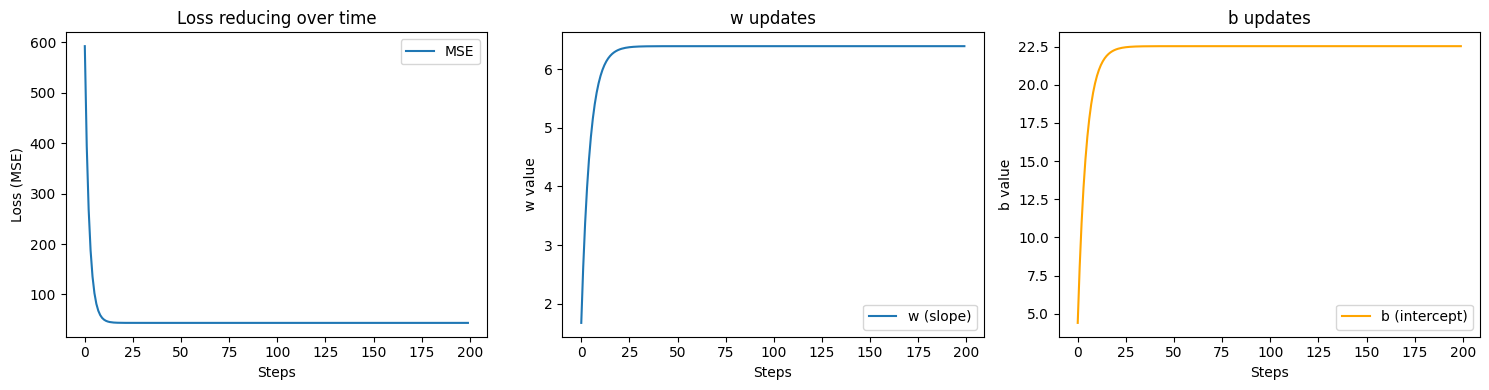

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 3) Train with logging
# -------------------------
eta = 0.1
steps = 200   # reduce for visualization

# Logs
w_log, b_log, loss_log = [], [], []

for t in range(steps):
    # Predictions
    y_hat = w * x + b  # Current result for this (w,b)-> prediction
    residuals = y_hat - y.flatten()  # predict-actualvalue (error)

    # Gradients
    dw = (2/m) * np.dot(residuals, x) # Loss function partial derivative with respect to W
    db = (2/m) * residuals.sum()  # Loss function partial derivative with respect to b

    # Update
    w = w - eta * dw  # wnew= wold -eta*dw
    b = b - eta * db  # bnew= bold -eta*db

    # Compute loss (MSE)
    J = (residuals**2).mean()   # loss = 1/m * (y_hat-y)^2  #mean

    # Log values
    w_log.append(w)
    b_log.append(b)
    loss_log.append(J)

# -------------------------
# 4) Plot results
# -------------------------

plt.figure(figsize=(15,4))

# Loss curve
plt.subplot(1,3,1)
plt.plot(loss_log, label="MSE")
plt.xlabel("Steps")
plt.ylabel("Loss (MSE)")
plt.title("Loss reducing over time")
plt.legend()

# w trajectory
plt.subplot(1,3,2)
plt.plot(w_log, label="w (slope)")
plt.xlabel("Steps")
plt.ylabel("w value")
plt.title("w updates")
plt.legend()

# b trajectory
plt.subplot(1,3,3)
plt.plot(b_log, label="b (intercept)", color="orange")
plt.xlabel("Steps")
plt.ylabel("b value")
plt.title("b updates")
plt.legend()

plt.tight_layout()
plt.show()


---

### **১) হাইপারপ্যারামিটার এবং লগ তৈরি করা**

```python
eta = 0.1
steps = 200   # reduce for visualization

# Logs
w_log, b_log, loss_log = [], [], []
```

* `eta` → **লার্নিং রেট**, প্রতিটি স্টেপে w ও b কতটা আপডেট হবে তা ঠিক করে।
* `steps` → মোট আপডেটের সংখ্যা।
* `w_log, b_log, loss_log` → এই তালিকাগুলো **প্রতিটি স্টেপের মান সংরক্ষণ করবে**, পরে প্লট করার জন্য।

---

### **২) গ্রেডিয়েন্ট ডিসেন্ট লুপ**

```python
for t in range(steps):
    # Predictions
    y_hat = w * x + b
    residuals = y_hat - y.flatten()
```

* `y_hat` → **বর্তমান w ও b দিয়ে পূর্বাভাস (prediction)**
* `residuals` → **ত্রুটি (prediction - actual)**

---

```python
    # Gradients
    dw = (2/m) * np.dot(residuals, x)
    db = (2/m) * residuals.sum()
```

* **dw** → `w` এর জন্য লস ফাংশনের অংশীয় ডেরিভেটিভ
* **db** → `b` এর জন্য লস ফাংশনের অংশীয় ডেরিভেটিভ
* সূত্রটি **MSE (Mean Squared Error)** এর গ্রেডিয়েন্ট থেকে এসেছে:

$$
\frac{\partial J}{\partial w} = \frac{2}{m} \sum (y_{\text{hat}} - y) x
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{m} \sum (y_{\text{hat}} - y)
$$

---

```python
    # Update
    w = w - eta * dw
    b = b - eta * db
```

* **ওজন (w) এবং বায়াস (b) আপডেট করা হচ্ছে** গ্রেডিয়েন্ট ডিসেন্ট ব্যবহার করে।
* `eta` হলো লার্নিং রেট → step size।

---

```python
    # Compute loss (MSE)
    J = (residuals**2).mean()
```

* বর্তমান step এর **MSE (Mean Squared Error)** হিসাব করা হচ্ছে।
* MSE = 1/m \* Σ(prediction - actual)²

---

```python
    # Log values
    w_log.append(w)
    b_log.append(b)
    loss_log.append(J)
```

* প্রতিটি স্টেপের **w, b, loss** সংরক্ষণ করা হচ্ছে পরবর্তী প্লটের জন্য।

---

### **৩) ফলাফল প্লট করা**

```python
plt.figure(figsize=(15,4))
```

* পুরো ফিগারের আকার বড় করা (15x4)

```python
# Loss curve
plt.subplot(1,3,1)
plt.plot(loss_log, label="MSE")
plt.xlabel("Steps")
plt.ylabel("Loss (MSE)")
plt.title("Loss reducing over time")
plt.legend()
```

* প্রথম সাবপ্লট → **Loss curve**, দেখাবে কিভাবে MSE কমছে স্টেপের সাথে।

```python
# w trajectory
plt.subplot(1,3,2)
plt.plot(w_log, label="w (slope)")
plt.xlabel("Steps")
plt.ylabel("w value")
plt.title("w updates")
plt.legend()
```

* দ্বিতীয় সাবপ্লট → **w এর মান কিভাবে আপডেট হচ্ছে**

```python
# b trajectory
plt.subplot(1,3,3)
plt.plot(b_log, label="b (intercept)", color="orange")
plt.xlabel("Steps")
plt.ylabel("b value")
plt.title("b updates")
plt.legend()
```

* তৃতীয় সাবপ্লট → **b এর মান কিভাবে আপডেট হচ্ছে**

```python
plt.tight_layout()
plt.show()
```

* গ্রাফগুলোকে সুন্দরভাবে সাজানো এবং দেখানো।

---





# 4. Predictions & Visualization

In [16]:
print(w)
print(b)

6.388975221817342
22.532806324110666


In [18]:
# ------------------------
# 4) Evaluate the model
# ------------------------
# Build predictions again using the learned w and b
Y_pred = (w * x + b).reshape(-1, 1)

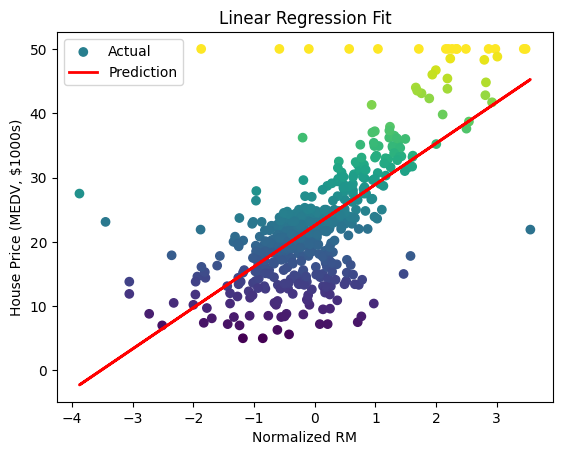

In [19]:
# ------------------------
# 5) Visualize the fit
# ------------------------
plt.scatter(x, y, label="Actual", c=y) # x is Normalized RM, c=y makes the points colorful based on the house price
plt.plot(x, Y_pred, linewidth=2, label="Prediction", color='red') # make the prediction line red
plt.legend()
plt.xlabel("Normalized RM")
plt.ylabel("House Price (MEDV, $1000s)")
plt.title("Linear Regression Fit")
plt.show()


# 5. Evaluation Metrics

5.1 Mean Absolute Error (MAE)

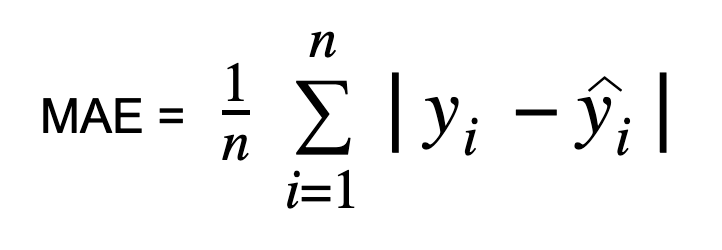

In [20]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, Y_pred)
print("MAE:", mae)

MAE: 4.447772901532233


```python
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, Y_pred)
print("MAE:", mae)
```

* **`mean_absolute_error` (MAE)**: এটি একটি **evaluation metric**, যা বলে **মডেলের prediction সাধারণত আসল মান থেকে কতটা দূরে**।
* এখানে `y` হলো আসল মান, `Y_pred` হলো মডেলের পূর্বাভাস।

---

**উদাহরণ অনুযায়ী:**

* MAE ≈ 4.45
* `MEDV` (median house value) **\$1000s এ আছে**, তাই 4.45 × 1000 ≈ **\$4,450**।
* অর্থাৎ, **মডেলের prediction গড়ে আসল মূল্যের থেকে \$4,450 দূরে**।

---

**টিপস:**

* সংখ্যা ছোট মনে হলেও বাস্তব অর্থে \$4,450 ছোট নয়।
* MAE **সরাসরি error এর মাত্রা** দেখায়, গড়ে prediction কতটা off।
* অন্যান্য metrics যেমন MSE বা RMSE ব্যবহার করলে বড় errors আরও বেশি penalize হয়।

---



ef701c6f-872f-4af2-a595-c82d257480e3_image6.avif

In [21]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, Y_pred)
print("MSE:", mse)

MSE: 43.60055177116957


# 5.3 Root Mean Squared Error (RMSE)

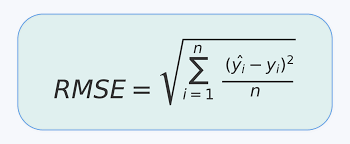

In [22]:

rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 6.603071389222562


# 5.4 R-Squared (R²)

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y, Y_pred)
print("R²:", r2)

R²: 0.4835254559913341



---

### **১) Mean Absolute Error (MAE ≈ 4.45)**

* **কি দেখায়:** গড়ে prediction কতটা **আসল মান থেকে দূরে** (absolute vertical error)।
* **ইউনিট:** target এর ইউনিট (এখানে \$1000s) → 4.45 ≈ \$4,450।
* **Interpretation:** “গড়ে আমরা \$4.45k ভুল করি।”
* **বৈশিষ্ট্য:** আউটলাইয়ার কম প্রভাব ফেলে, তাই **robust**।

---

### **২) Mean Squared Error (MSE ≈ 43.60)**

* **কি দেখায়:** error এর **গড় বর্গ**।
* **ইউনিট:** squared unit → (\$1000s)², তাই সরাসরি বোঝা কঠিন।
* **কেন প্রয়োগ করা হয়:** এটি **smooth** এবং বড় ভুলকে বেশি penalize করে।

---

### **৩) Root Mean Squared Error (RMSE ≈ 6.60)**

* **কি দেখায়:** MSE এর square root → আবার মূল ইউনিটে ফিরে আসে।
* **Interpretation:** “একটি typical error প্রায় \$6.6k।”
* **টিপস:** যেহেতু বড় ভুল squared হয়, তাই RMSE সবসময় **≥ MAE** (সমান হবে যদি সব errors সমান হয়)।

---

### **৪) R-squared (R² ≈ 0.48)**

* **কি দেখায়:** model কতটা variation (উত্থান-পতন) explain করছে।
* **Interpretation:** “প্রায় 48% variation মূল্যের explained হয়েছে room count দ্বারা; বাকি 52% noise বা অন্য factors।”
* **Special case:** R² < 0 → model এমনভাবে খারাপ, যে শুধু mean predict করলেও better হতো।

---

💡 **সারসংক্ষেপ:**

* **MAE:** সরাসরি গড় ভুল (\$4.45k)
* **MSE:** বড় ভুলকে emphasize করে
* **RMSE:** “typical” error \$6.6k
* **R²:** model কতটা data explain করছে (48%)

---


## 6. Choosing the Right Metric



---

### **MAE, MSE/RMSE, R² কবে ব্যবহার করবেন**

* **MAE:**

  * ব্যবহার করুন যখন **absolute error** গুরুত্বপূর্ণ।
  * **আউটলাইয়ারের প্রভাব কম**, তাই robust।

* **MSE / RMSE:**

  * ব্যবহার করুন যখন **বড় ভুল বড় সমস্যা**।
  * কারণ বড় errors squared হয় → বেশি penalize হয়।

* **R²:**

  * ব্যবহার করুন যখন **model এর overall goodness-of-fit** পরিমাপ করতে চান।
  * কতটা variation model explain করছে তা দেখায়।

---

### **প্র্যাক্টিকাল টিপস**

1. **Error magnitude দেখার জন্য:** MAE বা RMSE ব্যবহার করুন।
2. **Model interpretability বা বুঝার জন্য:** R² দেখুন।
3. **সিদ্ধান্ত নেওয়ার আগে:** একাধিক metrics **compare করুন**, শুধু একটির উপর নির্ভর করবেন না।

---

💡 **সারসংক্ষেপ:**

* MAE → গড় ভুল
* RMSE → বড় ভুল গুরুত্ব দেয়
* R² → model কতটা fit হয়েছে

---



# 7. Summary



---

### **Gradient Descent এবং Evaluation Metrics**

* **Gradient Descent:**

  * মডেলের জন্য **সর্বোত্তম লাইন বা ওজন (w, b) খুঁজে পেতে সাহায্য করে**।
  * লক্ষ্য: MSE কমানো → perfect prediction হলে MSE = 0।

---

### **MSE (Mean Squared Error)**

* error কে **square করে**, তাই বড় ভুলগুলো **অনেক বেশি গুরুত্ব পায়**।
* সমস্যা: ইউনিট squared → যেমন target \$1000 → MSE এর মান \$1000², তাই বোঝা কঠিন।

---

### **RMSE (Root Mean Squared Error)**

* MSE এর square root → আবার **মূল ইউনিটে ফিরে আসে** (\$1000s)।
* বড় ভুলকে এখনও বেশি penalize করে।
* **ব্যবহারযোগ্য এবং ব্যাখ্যা করা সহজ:**

  * উদাহরণ: “গড়ে prediction আসল মান থেকে \$4,500 দূরে।”

---

### **R² (R-squared)**

* regression এর জন্য **accuracy-এর মতো স্কোর**।
* বলে কতটা variation model explain করছে।
* উদাহরণ: R² = 0.48 → model মূল্যের 48% variation বোঝাতে সক্ষম, বাকিটা noise বা অন্য factor।

---

### **প্র্যাক্টিকাল টিপস**

* metrics নির্বাচন করুন **problem context অনুযায়ী**:

  * বড় ভুল গৃহীত কি না?
  * ব্যাখ্যা বা interpretability গুরুত্বপূর্ণ কি না?
* সাধারণভাবে:

  * **MAE / RMSE:** error magnitude দেখার জন্য
  * **R²:** goodness-of-fit বোঝার জন্য

---




# Using Multiple Varibales

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. Load Boston Housing Dataset
# -----------------------------
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# -----------------------------
# 2. Prepare Features and Target
# -----------------------------
X = housing.drop("MEDV", axis=1)  # all features except target
y = housing["MEDV"]               # target (house price in $1000s)


/tmp/ipython-input-3988353752.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


In [25]:

# -----------------------------
# 3. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
len(X_train.columns)

13

In [27]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [28]:
y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [29]:

# -----------------------------
# 4. Train Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)


# y= b + w0X0 + w1X1 + ... +w12X12  | feature scaling , Prinipal Axis

# b, w0, .... ,w12


LinearRegression()

In [30]:

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = model.predict(X_test)


Model Performance on Test Data:
MAE : 3.189
MSE : 24.291
RMSE: 4.929
R²  : 0.669


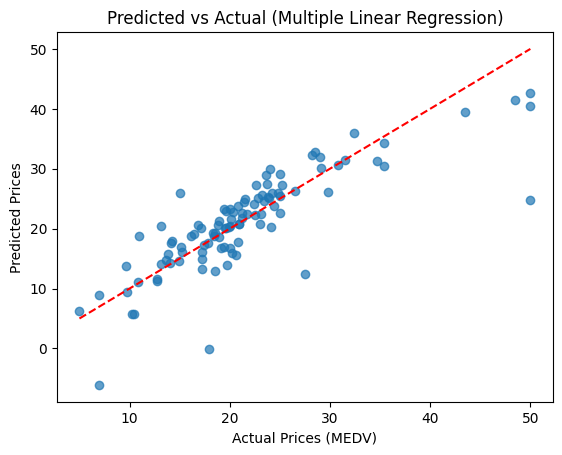

In [31]:

# -----------------------------
# 6. Evaluation Metrics
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance on Test Data:")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")

# -----------------------------
# 7. Plot Predicted vs Actual
# -----------------------------
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")  # ideal line
plt.show()
